# Exercise 2 from the intro to python gis course
https://github.com/AutoGIS-2017/Exercise-2

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import fiona

### Problem 1: Create Polygon from lists of coordinates (6 points)

In [2]:
# X -coordinates 
xcoords = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Y -coordinates
ycoords = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

In [3]:
# P1. Create a list of x and y coordinate pairs out of xcoords and ycoords
# ------------------------------------------------------------------------
# Coordinate pair can be either a tuple or a list.
# The first coordinate pair in the 'coordpairs' -list should look like: (29.99671173095703, 63.748023986816406)
# Hint: you might want to iterate over items in the lists using a for-loop

# lets avoid for loops and do some list comprehension
coordpairs = [(x,y) for x,y in zip(xcoords, ycoords)]
print(coordpairs[0])

(29.99671173095703, 63.748023986816406)


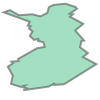

In [4]:
# P2. Create a shapely Polygon using the 'coordpairs' -list
# ------------------------------------------------------------------------
poly = Polygon(coordpairs)
poly

In [5]:
# P3. Create an empty GeoDataFrame
# ---------------------------------
geo = gpd.GeoDataFrame()

In [6]:
# P4. Insert our 'poly' -polygon into the 'geo' GeoDataFrame using a column name 'geometry' 
# ------------------------------------------------------------------------------------------
# Hint: Take advantage of .loc -funtion
geo['geometry'] = None
geo.loc[0, 'geometry'] = poly
geo

,geometry
0,"POLYGON ((29.99671173095703 63.74802398681641,..."


In [7]:
# P5. Save the GeoDataFrame into a new Shapefile called 'polygon.shp'
# --------------------------------------------------------------------
# Note: you do not need to define the coordinate reference system at this time
geo.to_file('./polygon.shp')

In [8]:
# P6. Plot the polygon using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure out of your plot and upload it to your GitHub repository.
# -----------------------------------------------------------------------------------------
geo['geometry'].plot()


### Problem 2: Points to map (6 points)

The problem 2 this week continues the process that we started last week, i.e. creating geometric point -objects and putting them into a map. 
Here our aim is to plot a set of x and y coordinates that we should read from a `some_posts.csv` comma separated file that contains following kind of data:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | userid |

*Note: although the data is based on real social media data, it is heavily anonymized. Userids and timestamps have been randomized, i.e. they do not not match with real ones, 
also spatial accuracy of the data have been lowered.*

- [Download the data](https://raw.githubusercontent.com/AutoGIS-2017/Exercise-2/master/data/some_posts.csv?token=AGWdzhgsQbNFI3lk6a5GxrjguPnmuhwoks5YKVWrwA%3D%3D) (Click on the link ==> CNTRL + S)
- Read the data into memory using Pandas
- Create an empty column called `geometry` where you will store shapely Point objects
- Iterate over the rows of the DataFrame and insert Point objects into column geometry (you need to use .loc indexer to update the row, [see materials](https://automating-gis-processes.github.io/2017/docs/lessons/L2/geopandas-basics.html#creating-geometries-into-a-geodataframe)
- Convert that DataFrame into a GeoDataFrame, [see hints](https://automating-gis-processes.github.io/2017/lessons/L2/exercise-2-hints.html)
- Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
- Save the data into a Shapefile called `Kruger_posts.shp`
- Create a simple map of those points using a GIS software or using `.plot()` -funtion in Python. Save it to GitHub as png file.

In [9]:
posts = gpd.geopandas.read_file('./some_posts.csv')
posts['lat'] = pd.to_numeric(posts['lat'])
posts['lon'] = pd.to_numeric(posts['lon'])
points = [Point(x, y) for x,y in zip(posts['lat'].tolist(), posts['lon'].tolist())]
posts['geometry'] = points
posts.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.980792492 31.484633302)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.499224667 31.508905612)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.342578456 30.930866066)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461393 31.519718439)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.921068894 31.520835558)


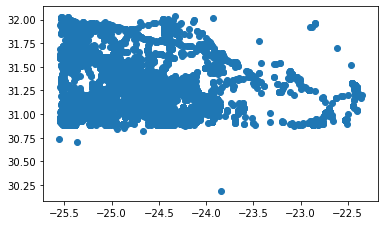

In [10]:
posts.crs = fiona.crs.from_epsg(4326)
posts.to_file('Kruger_posts.shp')
posts['geometry'].plot()

### Problem 3: How long distance individuals have travelled? (8 points)

In this problem the aim is to calculate the distance in meters that the individuals have travelled according the social
media posts (Euclidian distances between points).

Write your codes into the same file as in previous Problem (2).

In your code you should:

 - Reproject the data from WGS84 projection into ``EPSG:32735`` -projection which stands for UTM Zone 35S (UTM zone for South Africa) to transform the data into metric system.
 - Group the data by userid
 - Create an empty GeoDataFrame called ``movements``
 - For each user: 
    - [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) the rows by timestamp 
    - create LineString objects based on the points
    - [add](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) the geometry and the userid into the GeoDataFrame you created in the last step
 - Determine the CRS of the ``movements`` GeoDataFrame to ``EPSG:32735`` (epsg code: 32735)
 - Calculate the lenghts of the lines into a new column called ``distance`` in ``movements`` GeoDataFrame.
 - Save the movements of into a Shapefile called ``Some_movements.shp``

In [11]:
posts.crs = fiona.crs.from_epsg(32735)
posts['timestamp'] = pd.to_datetime(posts['timestamp'], format='%Y-%m-%d %H:%M', errors='coerce')

In [12]:
posts.sort_values(['userid', 'timestamp'], inplace=True)
posts.head(20)

,lat,lon,timestamp,userid,geometry
75328,-25.496454,31.513499,2015-11-21 09:39:00,10019337,POINT (-25.496454494 31.51349936)
19234,-25.031436,31.131282,2015-03-05 05:10:00,10019400,POINT (-25.031436252 31.131281769)
19473,-25.030995,31.133580,2015-06-06 14:42:00,10019400,POINT (-25.030995291 31.133580124)
19470,-25.030917,31.133576,2015-08-06 14:33:00,10019400,POINT (-25.030916878 31.133575682)
19472,-25.030958,31.133554,2015-08-06 14:38:00,10019400,POINT (-25.030958075 31.133553972)
19474,-25.030977,31.133550,2015-08-06 14:45:00,10019400,POINT (-25.030977353 31.133549782)
19339,-25.030968,31.133521,2015-09-05 15:46:00,10019400,POINT (-25.030967798 31.133521199)
35148,-24.324833,31.243000,2015-10-30 10:31:00,10020676,POINT (-24.324833333 31.243)
56511,-25.472567,31.090694,2015-03-02 16:12:00,10028023,POINT (-25.472567291 31.090693894)
55341,-25.496879,31.506578,2015-04-27 17:25:00,10028023,POINT (-25.496879122 31.50657777)
